#Question Answering Project



1.   Marim Amer: 21maem@queensu.ca
2.   Mawada Amer: 21maem1@queensu.ca
3.   Youmna Alsayed: 21yaaa@queensu.ca

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Download all important libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

#Levenshtein similarity install
!pip install python-Levenshtein

#Cosin & OverlapCoefficient sililarity install
!pip install py_stringmatching

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 7.6 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149870 sha256=67f9cb9be61163a52347ce3290120b1d861029b8a8c1e3664d6fce8feda32d15
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 661 kB 32.3 MB/s 
  Created wheel for py-stringmat

In [ ]:
#import liberaries that I will use in my code
import os
from lxml import objectify
import csv
import missingno as msno
import re
import pickle

import nltk # NLTK is a standard Python package with prebuilt functions and utilities for quick and easy use.
# from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from bokeh.io import output_notebook # It is used to create interactive visualisations for modern web browsers and to build graphics.
output_notebook()

# Import needed libraries. E.g., pandas, sklearn, nltk, etc. 
import numpy as np
import pandas as pd
import sklearn
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
#Display all rows
# pd.set_option('display.max_rows', None)

#Model libraries
from sklearn.model_selection import train_test_split

#Imbalanced data
from imblearn.over_sampling import RandomOverSampler
import collections

#Similarity
from Levenshtein import distance as levenshtein_distance
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Reading data

In [65]:
#Reading data
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Data_Analytics/Project/Data_2/paired_questions.csv")

#Dispaly the data
df

#Dispaly the shape of data
df.shape

(2479, 4)

In [66]:
#Display dataset
df

,question_id,user_question,database_question,judge_score
0,1,What are the references with noonan syndrome a...,What is (are) Polycystic ovary syndrome ? (Als...,1-Incorrect
1,1,What are the references with noonan syndrome a...,What causes Polycystic ovary syndrome ? (Also ...,1-Incorrect
2,1,What are the references with noonan syndrome a...,What causes Noonan syndrome ?,2-Related
3,1,What are the references with noonan syndrome a...,What are the complications of Noonan syndrome ?,2-Related
4,1,What are the references with noonan syndrome a...,How to prevent Noonan syndrome ?,2-Related
...,...,...,...,...
2474,104,Can you please provide Glimepiride storage & a...,What should I do if I forget a dose of Glimepi...,2-Related
2475,104,Can you please provide Glimepiride storage & a...,What are the side effects or risks of Glimepir...,2-Related
2476,104,Can you please provide Glimepiride storage & a...,What to do in case of emergency or overdose of...,2-Related
2477,104,Can you please provide Glimepiride storage & a...,What other information should I know about Gli...,2-Related


In [67]:
#Unique values in the question_id column
df['question_id'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104])

In [68]:
#Information about columns
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   question_id        2479 non-null   int64 
 1   user_question      2479 non-null   object
 2   database_question  2479 non-null   object
 3   judge_score        2479 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.6+ KB


In [69]:
#Discribe the data
df.describe()

,question_id
count,2479.000000
mean,51.393304
std,29.858339
min,1.000000
25%,26.000000
50%,50.000000
75%,77.000000
max,104.000000


In [70]:
#Check for null values
print('Number of null values:\n\n',df.isnull().sum())

#Number of duplicated data
print('\nNumber of duplicated rows: ',df.duplicated().sum())

#Remove all duplicated rows except the first row from duplicate
df.drop_duplicates(inplace = True)

Number of null values:

 question_id          0
user_question        0
database_question    0
judge_score          0
dtype: int64

Number of duplicated rows:  163


##Preprocessing

### Clean user_question and database_question columns

In [71]:
#Using english language 
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    """ steps:
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)  #White Space
    RE_TAGS = re.compile(r"<[^>]+>")    #Tags
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)    #ASCII
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE) #Single charachter between two spaces

    #Replace White Space, Tags, ASCII and Single charachter between two spaces with single space
    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)
    
    #Tokanization
    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]
    # words_tokens_lower = [[word.lower() for word in text.split()] for text in word_tokens]
    
    #Remove stop wprds
    words_filtered = [
        w for w in words_tokens_lower if not w.lower() in stop_words
    ]

    text_clean = " ".join(words_filtered)
    return text_clean

#Remove all words less than 3 letters
def remove_short(sentence):
    return ' '.join([word for word in sentence.split() if len(word) >= 3])
    
def remove_digits(sentence):
    return ' '.join([i for i in sentence.split() if not i.isdigit()])

#Apply the function of each row in the Title column
df['user_question'] = df['user_question'].apply(lambda x: clean_text(x))
df['user_question'] = df['user_question'].apply(lambda x: remove_short(x))
# df['user_question'] = df['user_question'].apply(lambda x: remove_digits(x))
df['database_question'] = df['database_question'].apply(lambda x: clean_text(x))
df['database_question'] = df['database_question'].apply(lambda x: remove_short(x))
# df['database_question'] = df['database_question'].apply(lambda x: remove_digits(x))

df['user_question']

0       references noonan syndrome polycystic renal di...
1       references noonan syndrome polycystic renal di...
2       references noonan syndrome polycystic renal di...
3       references noonan syndrome polycystic renal di...
4       references noonan syndrome polycystic renal di...
                              ...                        
2474    please provide glimepiride storage allowable t...
2475    please provide glimepiride storage allowable t...
2476    please provide glimepiride storage allowable t...
2477    please provide glimepiride storage allowable t...
2478    please provide glimepiride storage allowable t...
Name: user_question, Length: 2316, dtype: object

In [72]:
#Remove all \n or \t and so on
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

#lemmatization returns the word to its origin like(playing ==> play)
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    #Implement the lemmatize function in each row
    lemm_content = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    # lemm_content = ' '.join(lemm_content)
    return lemm_content

#Apply the function of each row in the Clean_text column
df['user_question'] = df['user_question'].apply(lemmatize_text)
df['database_question'] = df['database_question'].apply(lemmatize_text)


In [73]:
#Display user_question and database_question
print(df['user_question'][0])
print(df['database_question'][0])

['reference', 'noonan', 'syndrome', 'polycystic', 'renal', 'disease']
['polycystic', 'ovary', 'syndrome', 'also', 'called', 'polycystic', 'ovary', 'polycystic', 'ovary', 'disease', 'stein', 'leventhal', 'syndrome', 'polyfollicular', 'ovarian', 'disease']


### Clean column "judge_score"

In [ ]:
#Display unique values
df['judge_score'].unique()

array(['1-Incorrect', '2-Related', '3-Incomplete', '4-Excellent'],
      dtype=object)

In [ ]:
#Remove all words in the column just we take the number{'1':'Incorrect', '2': 'Related', '3': 'Incomplete', '4': 'Excellent'}
df['judge_score']=df['judge_score'].str.replace(r'[a-zA-z]',"")

#Removing '-'
df['judge_score']=df['judge_score'].str.replace(r'-',"")

#convert column type into int
df['judge_score'].astype(int)

#Display unique values in the column
df['judge_score'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


1    1339
2     630
3     215
4     132
Name: judge_score, dtype: int64

In [ ]:
df['judge_score']

0       1
1       1
2       2
3       2
4       2
       ..
2474    2
2475    2
2476    2
2477    2
2478    4
Name: judge_score, Length: 2316, dtype: int64

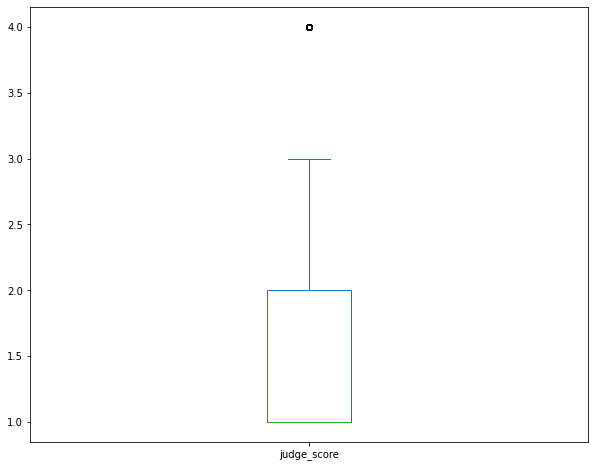

In [ ]:
import matplotlib.pyplot as plt 
% matplotlib inline
# fig = plt.figure(figsize =(10, 7))
 
#Convert values into numeric
df["judge_score"] = df["judge_score"].apply(pd.to_numeric) 

# Creating plot
df["judge_score"].plot.box(figsize=(10, 8))


We did not remove the 4 value as the outlier because this is an important value in our data, so we conceded it as imbalanced data, so we will solve it by oversampling.

##Splitting the data

In [ ]:
#Split data into input -> X and output -> y
y = df['judge_score']
X = df.drop(columns=['judge_score'])
# X = tfidf_df

In [ ]:
#Split dataset into 80% -> Training & 20% -> testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 120)
y_train

307     1
1436    1
1990    1
871     4
1215    1
       ..
581     2
10      3
767     1
1245    1
1890    1
Name: judge_score, Length: 1852, dtype: int64

##Imbalanced Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


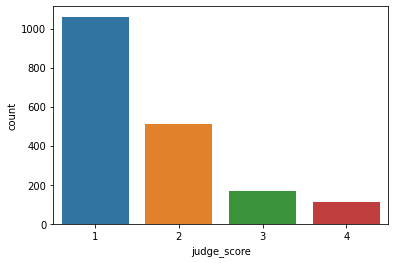

In [ ]:
# visualize the target variable
g = sns.countplot(y_train)
g.set_xticklabels(['1','2', '3', '4'])
plt.show()

In [ ]:
#Solve imbalanced data
ros = RandomOverSampler(random_state=42)
X_Train_balanced, y_Train_balanced = ros.fit_resample(X_train, y_train)
# fit predictor and target variablex_ros, y_ros = ros.fit_resample(X_train, y_train)

print('Original dataset shape', collections.Counter(y_train))
print('Resample dataset shape', collections.Counter(y_Train_balanced))

Original dataset shape Counter({1: 1060, 2: 512, 3: 169, 4: 111})
Resample dataset shape Counter({1: 1060, 4: 1060, 2: 1060, 3: 1060})


In [ ]:
print(X_Train_balanced.shape)
print(y_Train_balanced.shape)

(4240, 3)
(4240,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


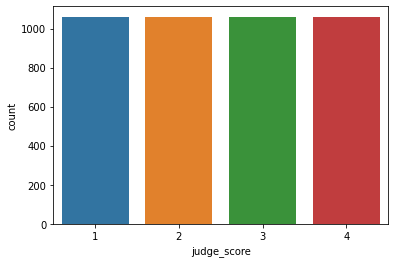

In [ ]:
# visualize the target variable
g = sns.countplot(y_Train_balanced)
g.set_xticklabels(['1','2', '3', '4'])
plt.show()

In [ ]:
print(X_Train_balanced.shape)
# print(y_Train_balanced.value_counts())

(4240, 3)


##Similarity Algorithms

###Jaccard Similarity

In [ ]:
def jaccard_similarity(A, B):
    #Find intersection of two sets
    nominator = set(A).intersection(set(B))

    #Find union of two sets
    denominator = set(A).union(set(B))

    #Take the ratio of sizes
    similarity = len(nominator)/len(denominator)
    
    return similarity

In [ ]:
# Apply jaccard_similarity on questions training
X_Train_balanced['Jaccard_Similarity'] = X_Train_balanced.apply(lambda x:jaccard_similarity(x['database_question'], x['user_question']), axis=1)

# Apply jaccard_similarity on questions testing
X_test['Jaccard_Similarity'] = X_test.apply(lambda x:jaccard_similarity(x['database_question'], x['user_question']), axis=1)


In [ ]:
#Confirm the dimension of the columns
#Training data
print("\t\t\tTraining Data")
print('Dimension of X train', X_Train_balanced.shape)
print('Dimension of X train of database question column', X_Train_balanced['database_question'].shape)
print('Dimension of X train of user question column', X_Train_balanced['user_question'].shape)
print('Dimension of y train', y_Train_balanced.shape)
print('Dimension of similarity column in traing data', X_Train_balanced['Jaccard_Similarity'].shape)

#Test data
print("\t\t\tTesting Data")
print('Dimension of X test', X_test.shape)
print('Dimension of y test', y_test.shape)
print('Dimension of similarity column in testing data', X_test['Jaccard_Similarity'].shape)

			Training Data
Dimension of X train (4240, 4)
Dimension of X train of database question column (4240,)
Dimension of X train of user question column (4240,)
Dimension of y train (4240,)
Dimension of similarity column in traing data (4240,)
			Testing Data
Dimension of X test (464, 4)
Dimension of y test (464,)
Dimension of similarity column in testing data (464,)


In [ ]:
X_Train_balanced['Jaccard_Similarity']

0       0.000000
1       0.000000
2       0.080000
3       0.166667
4       0.090909
          ...   
4235    0.222222
4236    0.181818
4237    0.062500
4238    0.000000
4239    0.285714
Name: Jaccard_Similarity, Length: 4240, dtype: float64

###Levenshtein Similarity

In [ ]:
# Apply Levenshtein_Similarity on questions training
#We use ' '.join(map(str, x['database_question'])) to convert each row from list to string

X_Train_balanced['Levenshtein_Similarity'] = X_Train_balanced.apply(lambda x:levenshtein_distance(' '.join(map(str, x['database_question'])), ' '.join(map(str, x['user_question']))), axis=1)
X_Train_balanced['Levenshtein_Similarity']


# Apply Levenshtein_Similarity on questions testing
X_test['Levenshtein_Similarity'] = X_test.apply(lambda x:levenshtein_distance(' '.join(map(str, x['database_question'])), ' '.join(map(str, x['user_question']))), axis=1)


In [ ]:
#Display values of the column
X_Train_balanced['Levenshtein_Similarity']

0       150
1        41
2       113
3        81
4        68
       ... 
4235     33
4236     57
4237     57
4238     33
4239     76
Name: Levenshtein_Similarity, Length: 4240, dtype: int64

In [ ]:
#Confirm the dimension of the columns
#Training data
print("\t\t\tTraining Data")
print('Dimension of X train', X_Train_balanced.shape)
print('Dimension of X train of database question column', X_Train_balanced['database_question'].shape)
print('Dimension of X train of user question column', X_Train_balanced['user_question'].shape)
print('Dimension of y train', y_Train_balanced.shape)
print('Dimension of similarity column in traing data', X_Train_balanced['Levenshtein_Similarity'].shape)

#Test data
print("\n\t\t\tTesting Data")
print('Dimension of X test', X_test.shape)
print('Dimension of y test', y_test.shape)
print('Dimension of similarity column in testing data', X_test['Levenshtein_Similarity'].shape)

			Training Data
Dimension of X train (4240, 5)
Dimension of X train of database question column (4240,)
Dimension of X train of user question column (4240,)
Dimension of y train (4240,)
Dimension of similarity column in traing data (4240,)

			Testing Data
Dimension of X test (464, 5)
Dimension of y test (464,)
Dimension of similarity column in testing data (464,)


###Dice Coefficient

In [ ]:
def dice_coefficient(a, b):
    """dice coefficient 2nt/(na + nb)."""
    """
    Computes the Dice coefficient, a measure of set similarity.
    Parameters
    ----------
    a : string
    b : string
    
    Returns
    -------
    dice : float
        Dice coefficient as a float on range [0,1].
        Maximum similarity = 1
        No similarity = 0
    """
    if not len(a) or not len(b): return 0.0
    if len(a) == 1:  a=a+u'.'
    if len(b) == 1:  b=b+u'.'
    
    a_bigram_list=[]
    for i in range(len(a)-1):
      a_bigram_list.append(a[i:i+2])
    b_bigram_list=[]
    for i in range(len(b)-1):
      b_bigram_list.append(b[i:i+2])
      
    a_bigrams = set(a_bigram_list)
    b_bigrams = set(b_bigram_list)
    overlap = len(a_bigrams & b_bigrams)
    dice_coeff = overlap * 2.0/(len(a_bigrams) + len(b_bigrams))
    return dice_coeff

In [ ]:
dice_coefficient('marim amer', 'amer Marim')
dice_coefficient('amer ', 'amer')

0.8571428571428571

In [ ]:
# Apply Dice_Coefficient_Similarity on questions training
X_Train_balanced['Dice_Coefficient_Similarity'] = X_Train_balanced.apply(lambda x:dice_coefficient(' '.join(map(str, x['database_question'])), ' '.join(map(str, x['user_question']))), axis=1)

# Apply Dice_Coefficient_Similarity on questions testing
X_test['Dice_Coefficient_Similarity'] = X_test.apply(lambda x:dice_coefficient(' '.join(map(str, x['database_question'])), ' '.join(map(str, x['user_question']))), axis=1)


###Overlap Coefficient

In [ ]:
import py_stringmatching as sm
oc = sm.OverlapCoefficient()

In [ ]:
# Apply jaccard_similarity on questions training
X_Train_balanced['Overlap_Coefficient_Similarity'] = X_Train_balanced.apply(lambda x:oc.get_raw_score(x['database_question'], x['user_question']), axis=1)

# Apply jaccard_similarity on questions testing
X_test['Overlap_Coefficient_Similarity'] = X_test.apply(lambda x:oc.get_raw_score(x['database_question'], x['user_question']), axis=1)

In [ ]:
X_Train_balanced['Overlap_Coefficient_Similarity']

0       0.000000
1       0.000000
2       0.285714
3       0.428571
4       0.500000
          ...   
4235    0.400000
4236    0.500000
4237    0.125000
4238    0.000000
4239    0.666667
Name: Overlap_Coefficient_Similarity, Length: 4240, dtype: float64

###Cosine Similarity

In [ ]:
import py_stringmatching as sm
cos = sm.Cosine()
# cos.get_raw_score(['marim'], ['Marim', 'amer'])

In [ ]:
# Apply jaccard_similarity on questions training
X_Train_balanced['Cosine_Similarity'] = X_Train_balanced.apply(lambda x:cos.get_raw_score(x['database_question'], x['user_question']), axis=1)

# Apply jaccard_similarity on questions testing
X_test['Cosine_Similarity'] = X_test.apply(lambda x:cos.get_raw_score(x['database_question'], x['user_question']), axis=1)

In [ ]:
X_Train_balanced['Cosine_Similarity']

0       0.000000
1       0.000000
2       0.169031
3       0.303046
4       0.223607
          ...   
4235    0.365148
4236    0.333333
4237    0.117851
4238    0.000000
4239    0.471405
Name: Cosine_Similarity, Length: 4240, dtype: float64

##Models

###Neural Network 

(1) Mean Absolute Error: 0.8319558968831753 Jaccard_Similarity

(2) Mean Absolute Error: 0.771062014431789 Levenshtein_Similarity

(3) Mean Absolute Error: 0.8227056532070555 Dice_Coefficient_Similarity

(4) Mean Absolute Error: 0.7907542617156588 Overlap_Coefficient_Similarity

(5) Mean Absolute Error: 0.790296655276726 Cosine_Similarity

(6) Mean Absolute Error: 0.6305673508637253 'Jaccard_Similarity','Levenshtein_Similarity', 'Dice_Coefficient_Similarity', 'Overlap_Coefficient_Similarity'
 
(7) Mean Absolute Error: 0.7991610693520513 'Jaccard_Similarity', 'Dice_Coefficient_Similarity', 'Overlap_Coefficient_Similarity'

(8) Mean Absolute Error: 0.7957715965036688 Cosine_Similarity & Overlap_Coefficient_Similarity & Jaccard_Similarity & Dice_Coefficient_Similarity & Levenshtein_Similarity

In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create NN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=1, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=200, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(units=150, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=50, kernel_initializer='normal', activation='relu'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_absolute_error', optimizer='adam')
# X_Train_balanced[:, ]
# Fitting the NN to the Training set
history = model.fit(X_Train_balanced[['Jaccard_Similarity']], y_Train_balanced ,batch_size = 20, epochs = 150, validation_split=0.2, verbose=1)

Epoch 1/150
170/170 [==============================] - 1s 3ms/step - loss: 0.8520 - val_loss: 2.1164
Epoch 2/150
170/170 [==============================] - 1s 3ms/step - loss: 0.7634 - val_loss: 2.0870
Epoch 3/150
170/170 [==============================] - 0s 3ms/step - loss: 0.7708 - val_loss: 1.7592
Epoch 4/150
170/170 [==============================] - 0s 3ms/step - loss: 0.7674 - val_loss: 1.8989
Epoch 5/150
170/170 [==============================] - 0s 3ms/step - loss: 0.7690 - val_loss: 2.0315
Epoch 6/150
170/170 [==============================] - 1s 3ms/step - loss: 0.7618 - val_loss: 2.0170
Epoch 7/150
170/170 [==============================] - 0s 3ms/step - loss: 0.7595 - val_loss: 1.9467
Epoch 8/150
170/170 [==============================] - 0s 3ms/step - loss: 0.7623 - val_loss: 1.9752
Epoch 9/150
170/170 [==============================] - 0s 3ms/step - loss: 0.7576 - val_loss: 1.9818
Epoch 10/150
170/170 [==============================] - 1s 3ms/step - loss: 0.7599 - val_lo

In [ ]:
#Predict the model
y_predict = model.predict(X_test[['Jaccard_Similarity']])
# y_predict

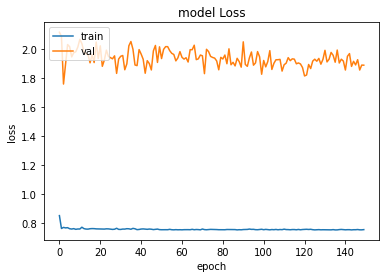

In [ ]:
#Plot the loss and val loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Evaluate the regression model
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))

0.6943040544531127
0.8319558968831753


###Passive Aggressive Regressor model
(1) Mean Absolute Error: 1.7307260330271736 Jaccard_Similarity

(2) Mean Absolute Error: 1.5697278618715456 Levenshtein_Similarity

(3) Mean Absolute Error: 0.9096772892555449 Dice_Coefficient_Similarity

(4) Mean Absolute Error: 0.6995773140772141 Overlap_Coefficient_Similarity

(5) Mean Absolute Error: 1.0130233720166915 Cosine_Similarity

(6) Mean Absolute Error: 1.9676307906374977 Cosine_Similarity & Overlap_Coefficient_Similarity & Jaccard_Similarity & Dice_Coefficient_Similarity & Levenshtein_Similarity



In [ ]:
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.datasets import make_regression

In [ ]:
regr = PassiveAggressiveRegressor(max_iter=100, random_state=0,
tol=1e-3)
history_PAR = regr.fit(X_Train_balanced[['Overlap_Coefficient_Similarity']], y_Train_balanced)


In [ ]:
#Predict the model
y_predict = regr.predict(X_test[ ['Overlap_Coefficient_Similarity']])
# y_predict

In [ ]:
#Evaluate the regression model
print(mean_absolute_error(y_test, y_predict))

0.6995773140772141


###Linear Regression model


1) Mean Absolute Error: 1.0814858060172858 ['Cosine_Similarity','Levenshtein_Similarity']

2) Mean Absolute Error: 1.1122617915755517 ['Cosine_Similarity'] 

3) Mean Absolute Error: 1.1122617915755517 ['Overlap_Coefficient_Similarity'] 

4) Mean Absolute Error: 1.1424492478513621 ['Dice_Coefficient_Similarity']

5) Mean Absolute Error: 1.0964518686215556 ['Levenshtein_Similarity']

6) Mean Absolute Error: 1.1155015717671133 ['Jaccard_Similarity']

7) Mean Absolute Error: 1.084778514275219 ['Cosine_Similarity', 'Overlap_Coefficient_Similarity', 'Jaccard_Similarity', 'Dice_Coefficient_Similarity', 'Levenshtein_Similarity']

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train_balanced[['Cosine_Similarity', 'Overlap_Coefficient_Similarity', 'Jaccard_Similarity', 'Dice_Coefficient_Similarity', 'Levenshtein_Similarity']], y_Train_balanced)
y_pred = regressor.predict(X_test[['Cosine_Similarity', 'Overlap_Coefficient_Similarity', 'Jaccard_Similarity', 'Dice_Coefficient_Similarity', 'Levenshtein_Similarity']])

In [ ]:
#Evaluate the regression model
print(mean_absolute_error(y_test, y_pred))

1.084778514275219


### KNN Model

(1) Mean Absolute Error: 0.6821120689655172 Jaccard_Similarity

(2) Mean Absolute Error: 0.8060344827586207 Levenshtein_Similarity

(3) Mean Absolute Error: 0.828125 Dice_Coefficient_Similarity

(4) Mean Absolute Error: 0.6594827586206896 Overlap_Coefficient_Similarity

(5) Mean Absolute Error: 0.681573275862069 Cosine_Similarity

(6) Mean Absolute Error: 0.6610991379310345 Cosine_Similarity & Overlap_Coefficient_Similarity

(7) Mean Absolute Error: 0.6610991379310345 Cosine_Similarity & Overlap_Coefficient_Similarity & Jaccard_Similarity

(8) Mean Absolute Error: 0.7548491379310345 Cosine_Similarity & Overlap_Coefficient_Similarity & Jaccard_Similarity & Dice_Coefficient_Similarity

(9) Mean Absolute Error: 0.8205818965517241 Cosine_Similarity & Overlap_Coefficient_Similarity & Jaccard_Similarity & Dice_Coefficient_Similarity & Levenshtein_Similarity

In [ ]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [ ]:

###### K-Nearest Neighbour(KNN) Regression in Python #######
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=4)
 
#Printing all the parameters of KNN
# print(RegModel)
 
#Creating the model on Training Data
KNN=RegModel.fit(X_Train_balanced[['Overlap_Coefficient_Similarity']], y_Train_balanced)
prediction=KNN.predict(X_test[['Overlap_Coefficient_Similarity']])

#Evaluate the regression model
print(mean_absolute_percentage_error(y_test, prediction)) 
print(mean_absolute_error(y_test, prediction))

0.42039331896551724
0.6594827586206896


### Decision Tree Model

1)  Mean Absolute Error: 0.6918103448275862 ['Cosine_Similarity','Levenshtein_Similarity']

3) Mean Absolute Error: 0.8405172413793104 ['Cosine_Similarity']

4) Mean Absolute Error: 1.0086206896551724 ['Overlap_Coefficient_Similarity']

5) Mean Absolute Error: 0.9331896551724138 ['Dice_Coefficient_Similarity']

6) Mean Absolute Error: 1.2262931034482758 ['Levenshtein_Similarity']

7) Mean Absolute Error: 1.0107758620689655 ['Jaccard_Similarity']

8) Mean Absolute Error: 0.6056034482758621 ['Jaccard_Similarity','Levenshtein_Similarity', 'Dice_Coefficient_Similarity', 'Overlap_Coefficient_Similarity', 'Cosine_Similarity']

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_Train_balanced[['Jaccard_Similarity','Levenshtein_Similarity', 'Dice_Coefficient_Similarity', 'Overlap_Coefficient_Similarity', 'Cosine_Similarity']], y_Train_balanced)

#Predict the response for test dataset
y_pred = clf.predict(X_test[['Jaccard_Similarity','Levenshtein_Similarity', 'Dice_Coefficient_Similarity', 'Overlap_Coefficient_Similarity', 'Cosine_Similarity']])

# Evaluating Model
print(mean_absolute_percentage_error(y_test, y_pred)) 
print(mean_absolute_error(y_test, y_pred))


0.4197198275862069
0.6400862068965517


###SVM Model

1) Mean Absolute Error: 1.1573275862068966 ['Cosine_Similarity','Levenshtein_Similarity']

2) Mean Absolute Error: 0.7629310344827587 ['Cosine_Similarity']

3) Mean Absolute Error: 0.7262931034482759 ['Overlap_Coefficient_Similarity']

4) Mean Absolute Error: 1.3426724137931034 ['Dice_Coefficient_Similarity']

5) Mean Absolute Error: 1.5581896551724137 ['Levenshtein_Similarity']

6) Mean Absolute Error: 0.6422413793103449 ['Jaccard_Similarity']

7) Mean Absolute Error: 1.0883620689655173 ['Jaccard_Similarity','Levenshtein_Similarity', 'Dice_Coefficient_Similarity', 'Overlap_Coefficient_Similarity', 'Cosine_Similarity']



In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel = 'linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_Train_balanced[['Jaccard_Similarity']], y_Train_balanced)

#Predict the response for test dataset
y_pred = clf.predict(X_test[['Jaccard_Similarity']])

In [ ]:
#Evaluating the Model
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

Accuracy: 0.5237068965517241
0.6422413793103449
